<a href="https://colab.research.google.com/github/NickLin910221/nutn_DBscience_course/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2")
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(SportsAnalytics)
library(ggplot2)

In [9]:
NBA1920 = fetch_NBAPlayerStatistics("19-20")
str(NBA1920)

'data.frame':	529 obs. of  25 variables:
 $ League             : Factor w/ 1 level "NBA": 1 1 1 1 1 1 1 1 1 1 ...
 $ Name               : chr  "Steven Adams" "Bam Adebayo" "Lamarcu Aldridge" "Kyle Alexander" ...
 $ Team               : Factor w/ 32 levels "ATL","BOS","BRO",..: 23 17 29 17 21 16 3 22 24 3 ...
 $ Position           : Factor w/ 5 levels "C","PF","PG",..: 1 2 1 2 5 5 2 5 4 4 ...
 $ GamesPlayed        : int  63 72 53 2 47 38 70 10 18 10 ...
 $ TotalMinutesPlayed : int  1679 2415 1757 13 590 721 1854 118 381 108 ...
 $ FieldGoalsMade     : int  283 440 391 1 98 117 302 19 25 10 ...
 $ FieldGoalsAttempted: int  478 791 794 2 266 251 465 44 86 38 ...
 $ ThreesMade         : int  1 2 61 0 46 57 0 5 9 6 ...
 $ ThreesAttempted    : int  3 14 157 0 133 141 6 16 36 29 ...
 $ FreeThrowsMade     : int  117 264 158 0 25 39 171 7 19 2 ...
 $ FreeThrowsAttempted: int  201 382 191 0 37 45 270 11 29 4 ...
 $ OffensiveRebounds  : int  208 177 104 2 9 8 216 2 24 1 ...
 $ TotalRebounds      

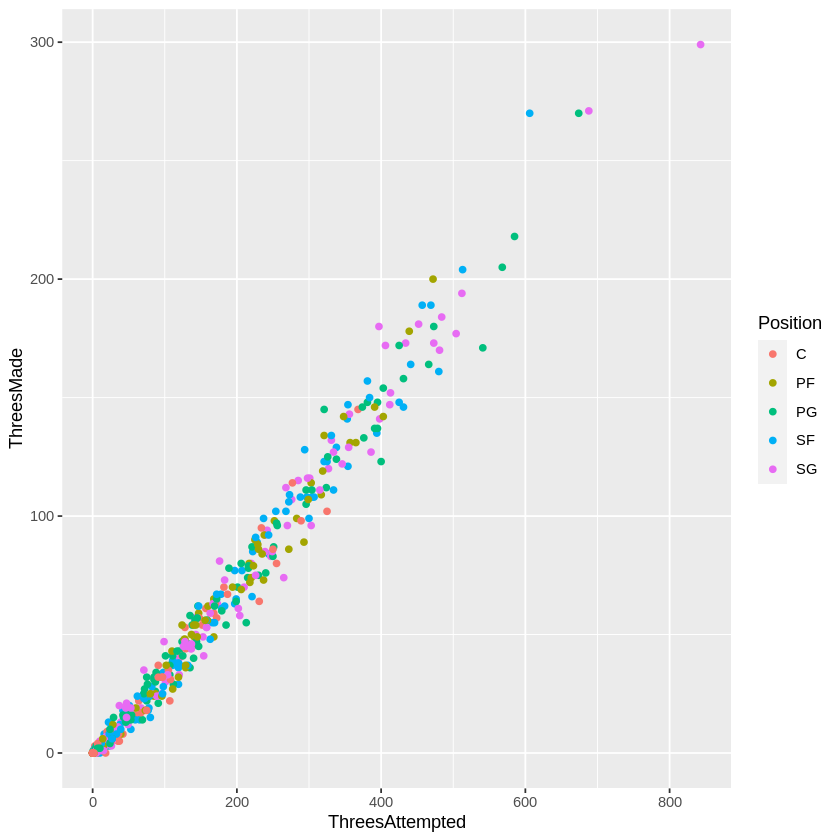

In [18]:
qplot(ThreesAttempted,ThreesMade,data = NBA1920,color=Position)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



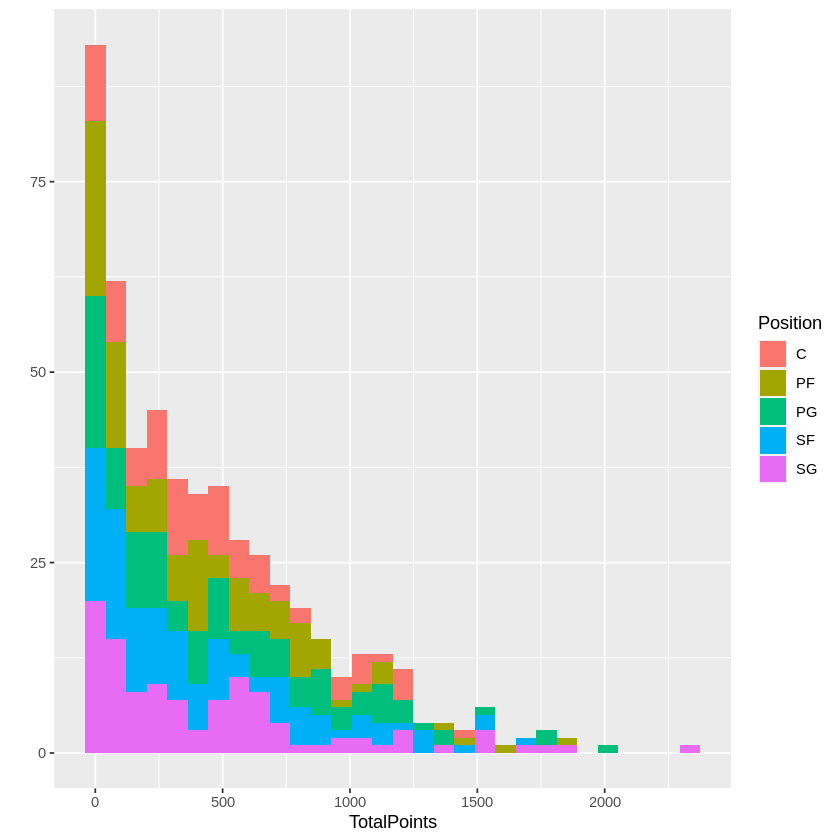

In [17]:
qplot(TotalPoints ,data = NBA1920,fill=Position)

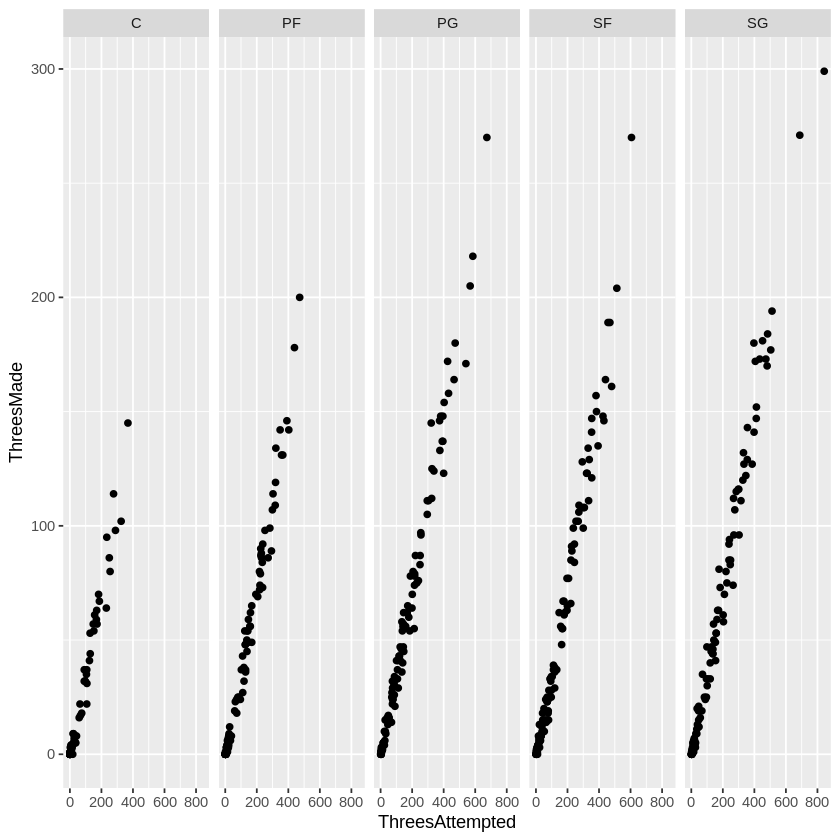

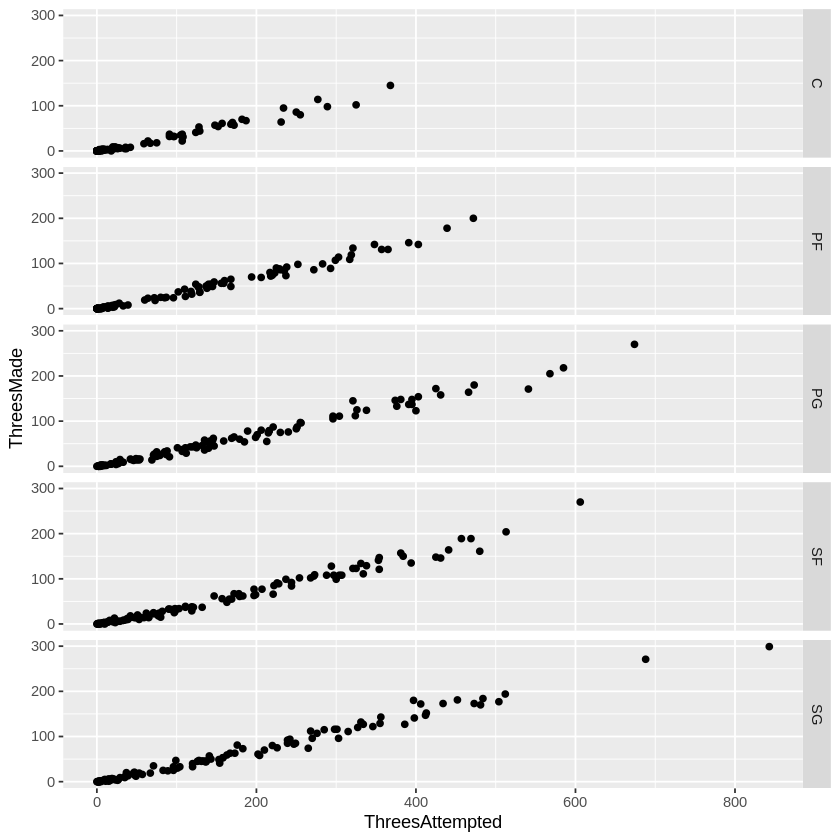

In [34]:
qplot(ThreesAttempted,ThreesMade,data = NBA1920,facets = . ~ Position)
qplot(ThreesAttempted,ThreesMade,data = NBA1920,facets = Position ~ .)

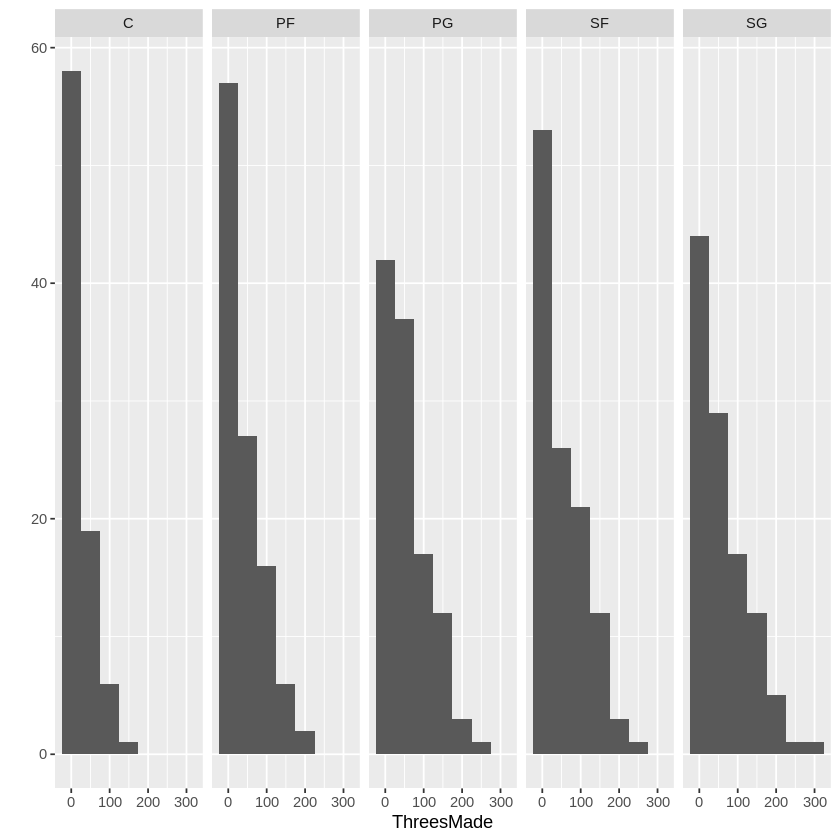

In [36]:
qplot(ThreesMade,data = NBA1920,facets = . ~ Position,binwidth = 50)

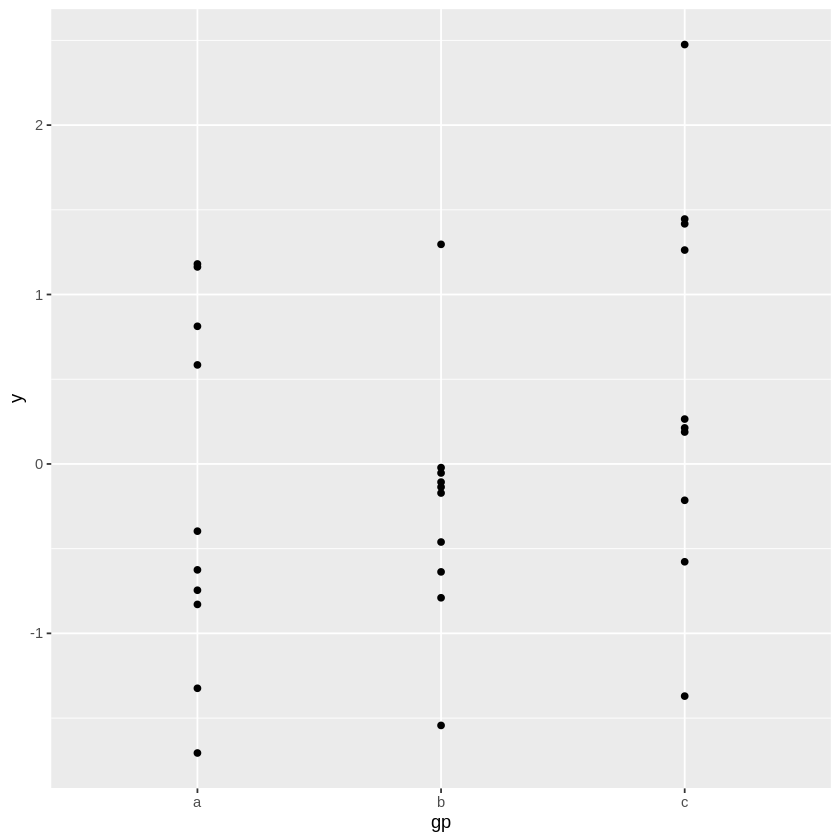

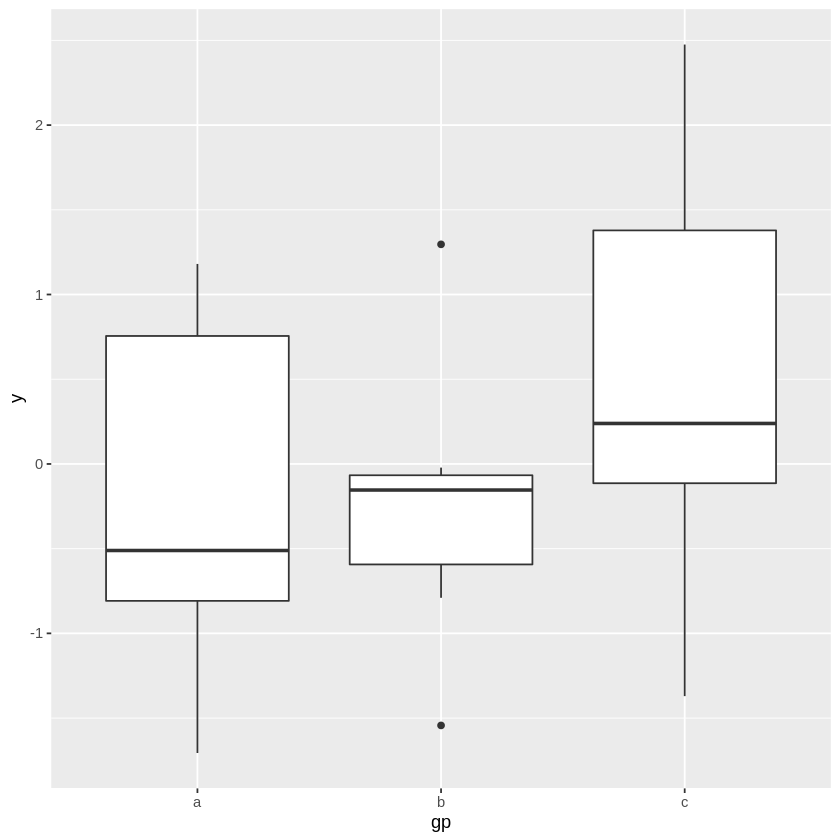

In [51]:
dataframe = data.frame(gp = factor(rep(letters[1:3],each = 10)),y = rnorm(30))
ggplot(dataframe,aes(x = gp,y = y)) + geom_point()
ggplot(dataframe,aes(x = gp,y = y)) + geom_boxplot()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



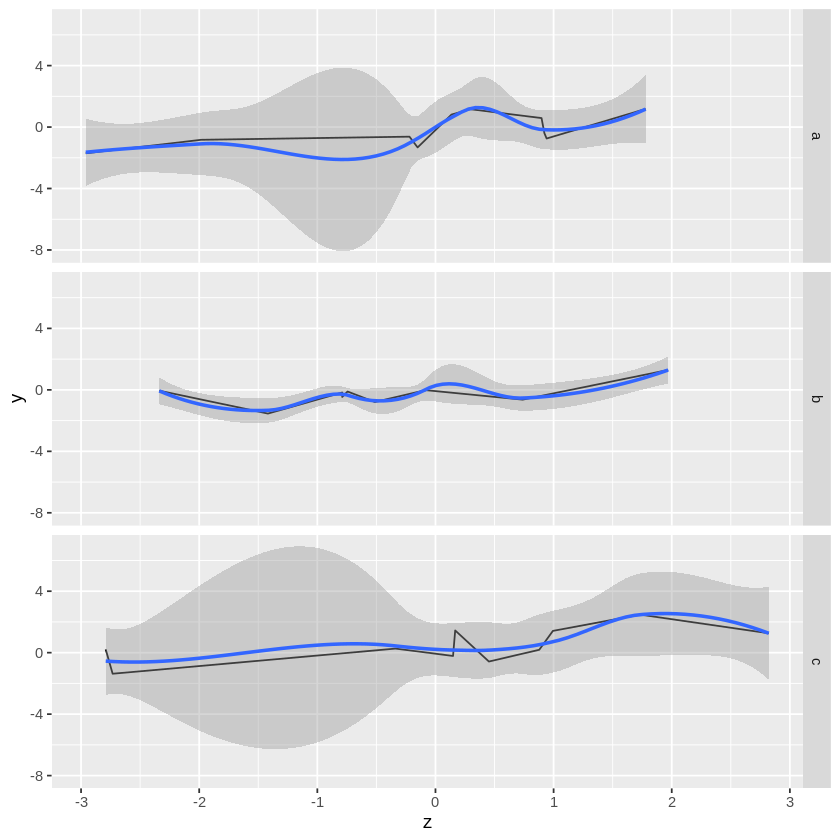

In [57]:
dataframe$z = dataframe$y+rnorm(30)
ggplot(dataframe,aes(x = z,y = y)) + geom_line() + facet_grid(gp~.) + geom_smooth()

In [58]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library(datasets)
library(data.table)

In [61]:
airquality$Month = as.factor(airquality$Month)
airquality.mean = data.table(airquality)[,.(OzoneMean = mean(Ozone,na.rm = T)),by = Month]

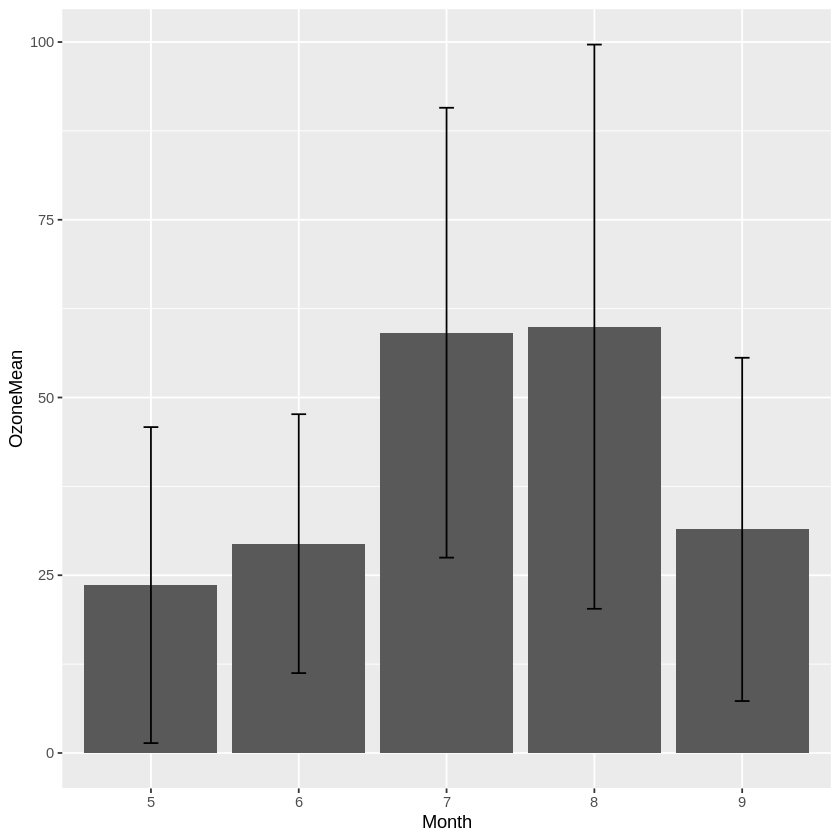

In [73]:
airquality.stat = data.table(airquality)[,.(OzoneMean = mean(Ozone,na.rm = T),OzoneSD = sd(Ozone,na.rm = T)),by = Month]
ggplot(data = airquality.stat) + geom_bar(data = airquality.mean,aes(x = Month,y = OzoneMean),stat = "identity") + geom_errorbar(aes(x = Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width = .1)